In [1]:
from poola import core as pool
import pandas as pd
import numpy as np
import seaborn as sns
import gpplot as gpp
import matplotlib.pyplot as plt
gpp.set_aesthetics(context = 'paper')

In [2]:
#define paths
file_path = "../../Data/secondaryLibrary/"
figure2_outpath = '../../Figures/Figure 2/'

In [3]:
#read in read counts
read_counts = pd.read_table(file_path+"countsMatrix.txt")
read_counts.head()

,Construct Barcode,Construct IDs,HCT116_RDB181_RepA,HCT116_RDB333_RepA,HCT116_RDB181_RepB,HCT116_RDB182_RepA,HCT116_RDB182_RepB,HCT116_RDB333_RepB,HCT116_RDB331_RepA,HCT116_RDB331_RepB,HCT116_RDB332_RepA,pDNA CP2084,HCT116_RDB332_RepB,Empty
0,AAGGCCACAACACTCAAGGA,SOD1,1588,1766,1386,1421,1293,1876,238,295,365,742,140,0
1,AACAAACAACCCCCTCGCCC,SOD1,1470,2054,1547,1307,1092,2103,791,784,589,1026,423,0
2,GTCGCCCTTCAGCACGCACA,SOD1,240,463,170,180,186,487,253,170,252,1228,122,0
3,AAATAAGAAACTCTATACTA,SOD1,224,377,170,106,135,427,133,132,196,799,109,0
4,GAGGGCAGTGATCTTAACTT,SOD1,405,899,377,336,344,815,136,111,64,941,88,1


In [4]:
#rename columns
read_counts.rename(columns={'Construct Barcode': 'sgRNA Sequence', 
 'Construct IDs': 'Target Gene Symbol', 
 'HCT116_RDB181_RepA': "dCas9-Kox1 RepA",
 'HCT116_RDB333_RepA': "dCas9-Kox1-MeCP2 RepA", 
 'HCT116_RDB181_RepB': "dCas9-Kox1 RepB", 
 'HCT116_RDB182_RepA': "dCas9-Zim3 RepA",
 'HCT116_RDB182_RepB': "dCas9-Zim3 RepB", 
 'HCT116_RDB333_RepB': "dCas9-Kox1-MeCP2 RepB", 
 'HCT116_RDB331_RepA': "Kox1-dCas9 RepA",
 'HCT116_RDB331_RepB': "Kox1-dCas9 RepB", 
 'HCT116_RDB332_RepA': "Zim3-dCas9 RepA", 
 "pDNA CP2084":'pDNA',
 "HCT116_RDB332_RepB":'Zim3-dCas9 RepB'}, inplace=True)
read_counts.columns

Index(['sgRNA Sequence', 'Target Gene Symbol', 'dCas9-Kox1 RepA',
       'dCas9-Kox1-MeCP2 RepA', 'dCas9-Kox1 RepB', 'dCas9-Zim3 RepA',
       'dCas9-Zim3 RepB', 'dCas9-Kox1-MeCP2 RepB', 'Kox1-dCas9 RepA',
       'Kox1-dCas9 RepB', 'Zim3-dCas9 RepA', 'pDNA', 'Zim3-dCas9 RepB',
       'Empty'],
      dtype='object')

In [5]:
read_counts.drop('Empty', axis=1, inplace=True)

In [6]:
#define list of columns to convert to floats and calculate lognorms for
columns_to_convert = ['dCas9-Kox1 RepA',
       'dCas9-Kox1-MeCP2 RepA', 'dCas9-Kox1 RepB', 'dCas9-Zim3 RepA',
       'dCas9-Zim3 RepB', 'dCas9-Kox1-MeCP2 RepB', 'Kox1-dCas9 RepA',
       'Kox1-dCas9 RepB', 'Zim3-dCas9 RepA', 'pDNA', 'Zim3-dCas9 RepB']

In [7]:
# Check DataFrame shape
print(read_counts.shape)


(20805, 13)


In [8]:
# Check for missing values
print(read_counts[columns_to_convert].isnull().sum())

for col in columns_to_convert:
    read_counts[col] = read_counts[col].astype(float)

dCas9-Kox1 RepA          0
dCas9-Kox1-MeCP2 RepA    0
dCas9-Kox1 RepB          0
dCas9-Zim3 RepA          0
dCas9-Zim3 RepB          0
dCas9-Kox1-MeCP2 RepB    0
Kox1-dCas9 RepA          0
Kox1-dCas9 RepB          0
Zim3-dCas9 RepA          0
pDNA                     0
Zim3-dCas9 RepB          0
dtype: int64


In [9]:
#calculate log-normalized reads and filter guides with low representation in pDNA
lognorms = pool.lognorm_columns(reads_df=read_counts, columns=columns_to_convert)
filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['pDNA'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' rows due to low pDNA abundance')

Filtered 112 rows due to low pDNA abundance


In [10]:
#calculate log-fold changes with respect to pDNA
lfc_df = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_col='pDNA', 
                             target_cols=['dCas9-Kox1 RepA',
       'dCas9-Kox1-MeCP2 RepA', 'dCas9-Kox1 RepB', 'dCas9-Zim3 RepA',
       'dCas9-Zim3 RepB', 'dCas9-Kox1-MeCP2 RepB', 'Kox1-dCas9 RepA',
       'Kox1-dCas9 RepB', 'Zim3-dCas9 RepA', 'Zim3-dCas9 RepB'])

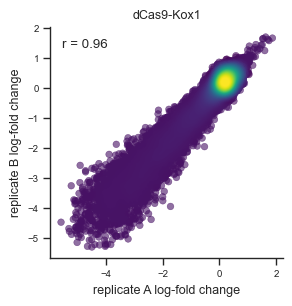

In [14]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=lfc_df, x='dCas9-Kox1 RepA', y='dCas9-Kox1 RepB')
gpp.add_correlation(data=lfc_df, x='dCas9-Kox1 RepA', y='dCas9-Kox1 RepB')
sns.despine()

plt.xlabel('replicate A log-fold change',fontsize=9)
plt.ylabel('replicate B log-fold change',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('dCas9-Kox1',fontsize=9)
gpp.savefig(figure2_outpath+'dCas9_Kox1_rep_corr.pdf',dpi=300, bbox_inches='tight')

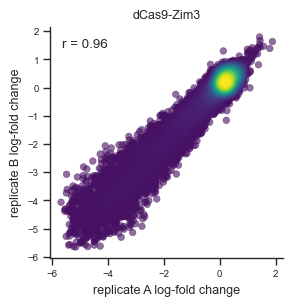

In [15]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=lfc_df, x='dCas9-Zim3 RepA', y='dCas9-Zim3 RepB')
gpp.add_correlation(data=lfc_df, x='dCas9-Zim3 RepA', y='dCas9-Zim3 RepB')
sns.despine()

plt.xlabel('replicate A log-fold change',fontsize=9)
plt.ylabel('replicate B log-fold change',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('dCas9-Zim3',fontsize=9)
gpp.savefig(figure2_outpath+'dCas9_Zim3_rep_corr.pdf',dpi=300, bbox_inches='tight')

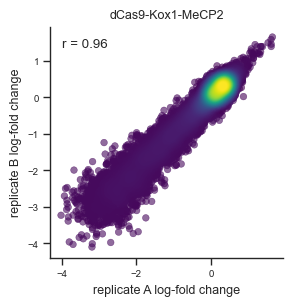

In [16]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=lfc_df, x='dCas9-Kox1-MeCP2 RepA', y='dCas9-Kox1-MeCP2 RepB')
gpp.add_correlation(data=lfc_df, x='dCas9-Kox1-MeCP2 RepA', y='dCas9-Kox1-MeCP2 RepB')
sns.despine()

plt.xlabel('replicate A log-fold change',fontsize=9)
plt.ylabel('replicate B log-fold change',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('dCas9-Kox1-MeCP2',fontsize=9)
gpp.savefig(figure2_outpath+'dCas9_Kox1_MeCP2_rep_corr.pdf',dpi=300, bbox_inches='tight')

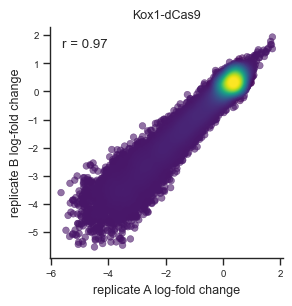

In [17]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=lfc_df, x='Kox1-dCas9 RepA', y='Kox1-dCas9 RepB')
gpp.add_correlation(data=lfc_df, x='Kox1-dCas9 RepA', y='Kox1-dCas9 RepB')
sns.despine()

plt.xlabel('replicate A log-fold change',fontsize=9)
plt.ylabel('replicate B log-fold change',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Kox1-dCas9',fontsize=9)
gpp.savefig(figure2_outpath+'Kox1_dCas9_rep_corr.pdf',dpi=300, bbox_inches='tight')

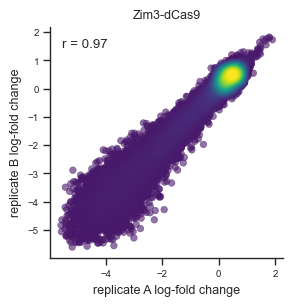

In [18]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=lfc_df, x='Zim3-dCas9 RepA', y='Zim3-dCas9 RepB')
gpp.add_correlation(data=lfc_df, x='Zim3-dCas9 RepA', y='Zim3-dCas9 RepB')
sns.despine()

plt.xlabel('replicate A log-fold change',fontsize=9)
plt.ylabel('replicate B log-fold change',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Zim3-dCas9',fontsize=9)
gpp.savefig(figure2_outpath+'Zim3_dCas9_rep_corr.pdf',dpi=300, bbox_inches='tight')

In [19]:
#average LFCs across replicates
avg_replicate_lfc_df = lfc_df.copy()
replicate_columns = {
    'dCas9-Kox1': ['dCas9-Kox1 RepA', 'dCas9-Kox1 RepB'],
    'dCas9-Kox1-MeCP2': ['dCas9-Kox1-MeCP2 RepA', 'dCas9-Kox1-MeCP2 RepB'],
    'dCas9-Zim3': ['dCas9-Zim3 RepA', 'dCas9-Zim3 RepB'],
    'Kox1-dCas9': ['Kox1-dCas9 RepA', 'Kox1-dCas9 RepB'],
    'Zim3-dCas9': ['Zim3-dCas9 RepA', 'Zim3-dCas9 RepB']
}

for group, cols in replicate_columns.items():
    avg_replicate_lfc_df[group] = avg_replicate_lfc_df[cols].mean(axis=1)  

    avg_replicate_lfc_df.drop(columns=cols, inplace=True)

In [20]:
#calculate z-scores with respect to intergenic controls
clt_avg_replicate_lfc_df = avg_replicate_lfc_df[avg_replicate_lfc_df['Target Gene Symbol'].str.contains('ONE_INTERGENIC')]

means = clt_avg_replicate_lfc_df[['dCas9-Kox1', 'dCas9-Kox1-MeCP2',
       'dCas9-Zim3', 'Kox1-dCas9', 'Zim3-dCas9']].mean()
std_devs = clt_avg_replicate_lfc_df[['dCas9-Kox1', 'dCas9-Kox1-MeCP2',
       'dCas9-Zim3', 'Kox1-dCas9', 'Zim3-dCas9']].std()

for col in ['dCas9-Kox1', 'dCas9-Kox1-MeCP2',
       'dCas9-Zim3', 'Kox1-dCas9', 'Zim3-dCas9']:
    avg_replicate_lfc_df[f'{col} (Z-score)'] = (avg_replicate_lfc_df[col] - means[col]) / std_devs[col]


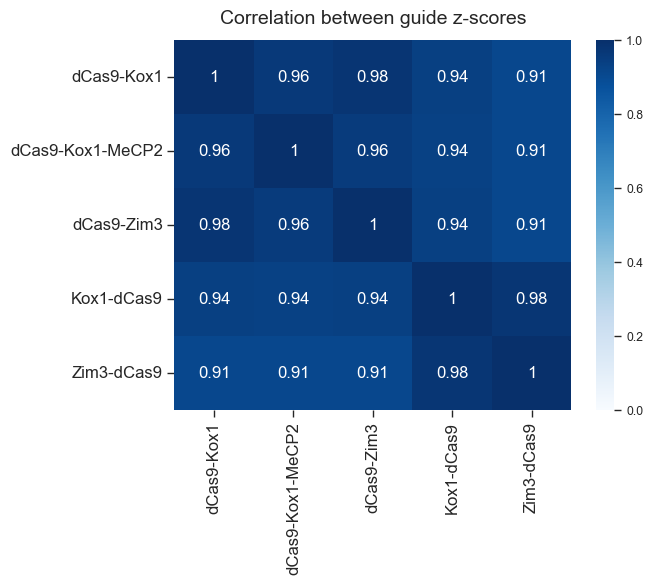

In [21]:
z_score_columns = avg_replicate_lfc_df.columns[avg_replicate_lfc_df.columns.str.contains('Z-score')]

correlation_matrix = avg_replicate_lfc_df[z_score_columns].corr(method='pearson')
correlation_matrix.columns = [x[0:-10] for x in correlation_matrix.columns]
correlation_matrix.index = [x[0:-10] for x in correlation_matrix.index]

guide_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap = 'Blues', vmin=0,vmax=1, annot_kws={"size": 12})
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
guide_heatmap.set_title('Correlation between guide z-scores', fontdict={'fontsize':14}, pad=12)
gpp.savefig(figure2_outpath+'Guide_Level_Zscore_Heatmap.pdf', dpi=300, bbox_inches='tight')

In [22]:
secLibDesign = pd.read_csv('../../Data/primaryLibrary/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
secLibDesignAnno = secLibDesign[['Target Gene Symbol', 'Category']].drop_duplicates()
lfc_df_annot = avg_replicate_lfc_df.merge(secLibDesignAnno, on = 'Target Gene Symbol', how = 'inner')

In [23]:
#create dataframe that can be used to create boxplots of guide LFCs stratified by gene essentiality
lfc_columns = lfc_df_annot.columns[~lfc_df_annot.columns.str.endswith('(Z-score)') &
                                   lfc_df_annot.columns.str.contains('dCas9')].tolist()
plot_df = lfc_df_annot[['Category'] + lfc_columns].melt(id_vars = 'Category', var_name = 'condition', value_name = 'Average LFC')
plot_df['condition'] = plot_df['condition'].str.replace('-',' ')
plot_df = plot_df[~plot_df['Category'].str.contains('INTERGENIC')]

#calculate SSMD
ssmd_df = plot_df.groupby(['condition','Category']).agg(mean = ('Average LFC','mean'),
                                              std = ('Average LFC','std')).reset_index()
ssmd_df = ssmd_df.pivot(columns = 'Category', index = 'condition', values = ['mean','std']).reset_index()
ssmd_df['mean_diff'] = ssmd_df['mean']['Non-essential'] - ssmd_df['mean']['Essential']
ssmd_df['pooled_std'] = np.sqrt(ssmd_df['std']['Non-essential']**2 + ssmd_df['std']['Essential']**2)
ssmd_df['ssmd'] = ssmd_df['mean_diff']/ssmd_df['pooled_std']

In [24]:
plot_df['condition'].unique()

array(['dCas9 Kox1', 'dCas9 Kox1 MeCP2', 'dCas9 Zim3', 'Kox1 dCas9',
       'Zim3 dCas9'], dtype=object)

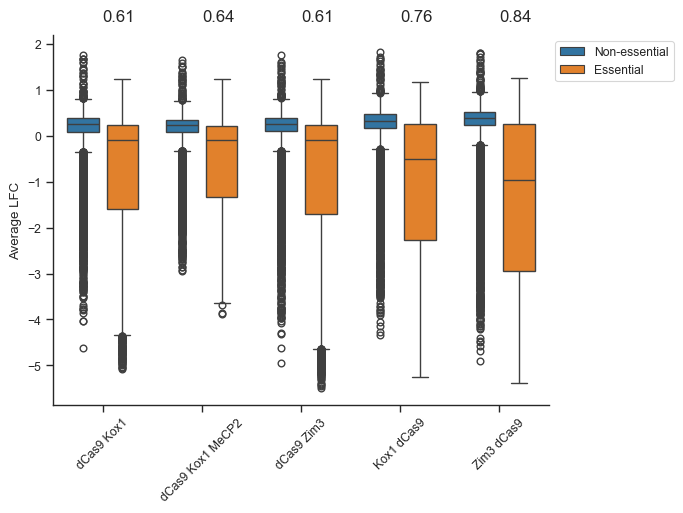

In [25]:
sns.boxplot(data = plot_df, x = 'condition', y = 'Average LFC', hue = 'Category', palette = {'Non-essential':'#1f77b4','Essential':'#ff7f0e'},
            order = ['dCas9 Kox1','dCas9 Kox1 MeCP2','dCas9 Zim3','Kox1 dCas9','Zim3 dCas9'],gap = 0.2, hue_order = ['Non-essential','Essential'])
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('')

sns.despine()
for condition in ssmd_df['condition']:
    ssmd = round(float(ssmd_df.loc[ssmd_df['condition'] == condition,'ssmd']),2)
    plt.text(x=condition,y=2.5,s=ssmd,fontsize=12)
plt.xticks(rotation=45)

gpp.savefig(figure2_outpath+'secondary_lib_guide_lfc_boxplot_ssmd.pdf',dpi=300, bbox_inches='tight')

### Compare primary and secondary tiling screen results

In [26]:
merged_df = pd.read_csv('../../Data/primaryLibrary/inHouseDatasetsCombined.csv')
primary_secondary_guide_zscores = avg_replicate_lfc_df[['sgRNA Sequence',
                                                          'dCas9-Kox1 (Z-score)',
                                                          'dCas9-Zim3 (Z-score)']].merge(merged_df[['sgRNA Sequence',
                                                                                                     'z_scored_avg_lfc_HCT116_Kox1',
                                                                                                     'z_scored_avg_lfc_HCT116_Zim3']],
                                                                                         on = 'sgRNA Sequence', how = 'inner')
primary_secondary_guide_zscores

,sgRNA Sequence,dCas9-Kox1 (Z-score),dCas9-Zim3 (Z-score),z_scored_avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Zim3
0,AAGGCCACAACACTCAAGGA,0.708800,0.710099,-0.598167,0.696859
1,AACAAACAACCCCCTCGCCC,-0.645150,-1.157140,-1.969694,0.333204
2,GTCGCCCTTCAGCACGCACA,-9.928472,-9.344444,-7.024958,-6.755210
3,AAATAAGAAACTCTATACTA,-8.167179,-9.051649,-6.914372,-5.274082
4,GAGGGCAGTGATCTTAACTT,-6.092453,-5.886349,-5.560050,-6.870088
...,...,...,...,...,...
20476,ATGAGCTAACGGAGGCACGA,0.356433,0.450395,-0.179821,0.304137
20477,TTGCCTTCGCTGTCAAACCC,0.573704,-0.070497,0.096891,0.720062
20478,CAAGCTCGGATTGCAATTTG,0.459051,0.406360,0.135203,0.383078
20479,AAGAAACAAGTCGTGACACC,0.499644,0.197864,-0.059114,0.773555


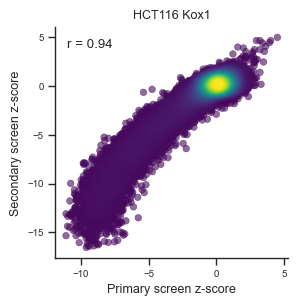

In [27]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=primary_secondary_guide_zscores, x='z_scored_avg_lfc_HCT116_Kox1', y='dCas9-Kox1 (Z-score)')
gpp.add_correlation(data=primary_secondary_guide_zscores, x='z_scored_avg_lfc_HCT116_Kox1', y='dCas9-Kox1 (Z-score)')
sns.despine()

plt.xlabel('Primary screen z-score',fontsize=9)
plt.ylabel('Secondary screen z-score',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('HCT116 Kox1',fontsize=9)
gpp.savefig(figure2_outpath+'primary_secondary_Kox1_zscore_corr.pdf',dpi=300, bbox_inches='tight')

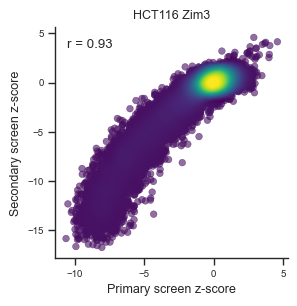

In [28]:
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=primary_secondary_guide_zscores, x='z_scored_avg_lfc_HCT116_Zim3', y='dCas9-Zim3 (Z-score)')
gpp.add_correlation(data=primary_secondary_guide_zscores, x='z_scored_avg_lfc_HCT116_Zim3', y='dCas9-Zim3 (Z-score)')
sns.despine()

plt.xlabel('Primary screen z-score',fontsize=9)
plt.ylabel('Secondary screen z-score',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('HCT116 Zim3',fontsize=9)
gpp.savefig(figure2_outpath+'primary_secondary_zim3_zscore_corr.pdf',dpi=300, bbox_inches='tight')

In [29]:
#calculate average z-score per gene
avg_zscore_df = avg_replicate_lfc_df[['sgRNA Sequence', 'Target Gene Symbol']+z_score_columns.tolist()].copy()
averaged_gene_zscore = avg_zscore_df.groupby('Target Gene Symbol')[z_score_columns].mean().reset_index()
averaged_gene_zscore.head()

,Target Gene Symbol,dCas9-Kox1 (Z-score),dCas9-Kox1-MeCP2 (Z-score),dCas9-Zim3 (Z-score),Kox1-dCas9 (Z-score),Zim3-dCas9 (Z-score)
0,AURKB,-8.968023,-8.169220,-9.170023,-9.626409,-10.660867
1,BEND2,-0.180908,-0.163782,-0.218245,-0.299843,-0.420661
2,BRIX1,-1.476589,-1.466473,-1.503454,-2.436684,-3.492963
3,C10orf53,-0.271527,-0.212989,-0.264720,-0.342299,-0.492647
4,C8orf17,-0.134289,-0.081584,-0.100591,-0.254919,-0.248412


In [30]:
secondary_GeneAnnoZscore = pd.merge(averaged_gene_zscore,secLibDesignAnno,on = 'Target Gene Symbol')
secondary_GeneAnnoZscore.Category.value_counts()

ONE_INTERGENICO_CTL    1993
Essential                30
Non-essential            30
Name: Category, dtype: int64

In [31]:
selected_secondary_GeneAnnoZscore = secondary_GeneAnnoZscore[secondary_GeneAnnoZscore.Category.isin(['Essential', 'Non-essential'])].copy()

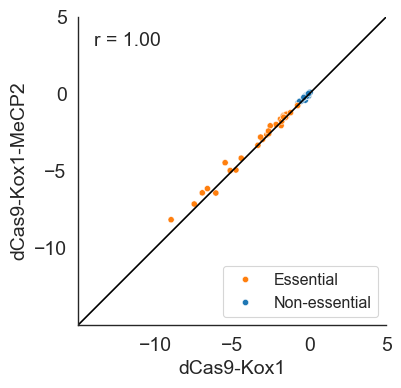

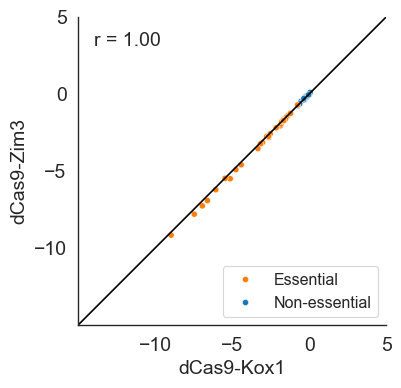

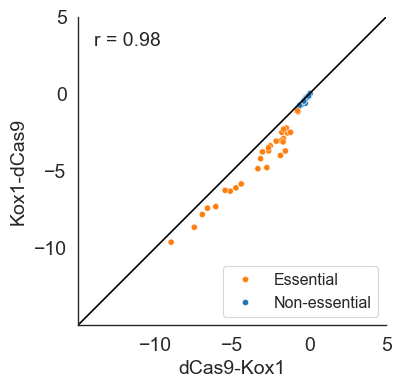

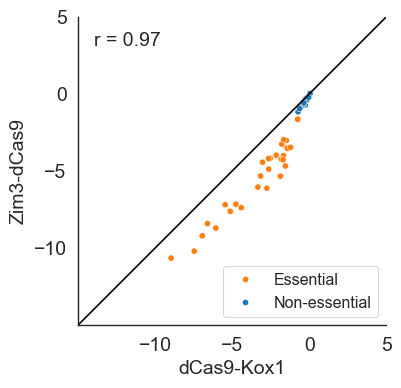

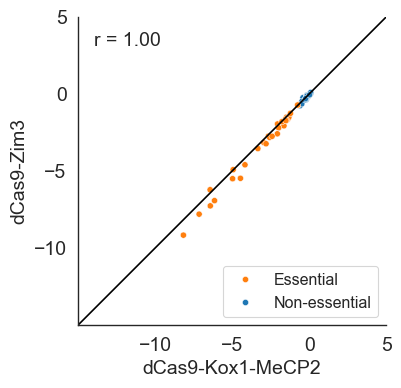

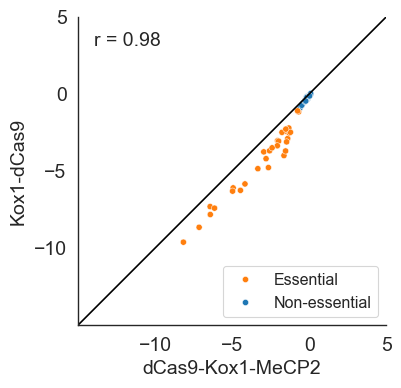

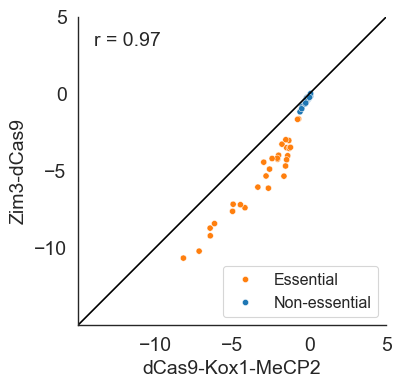

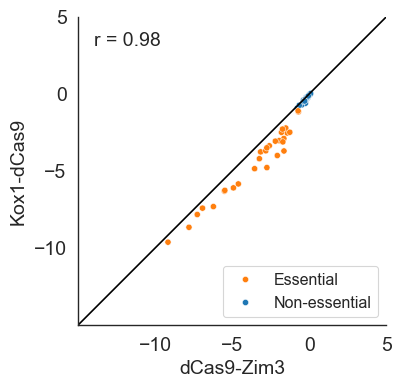

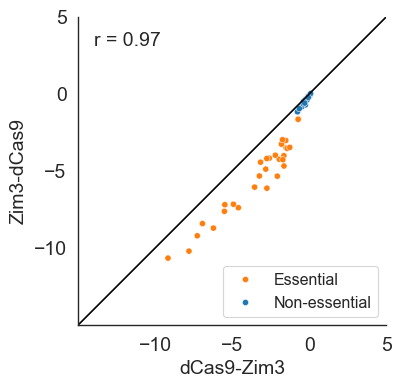

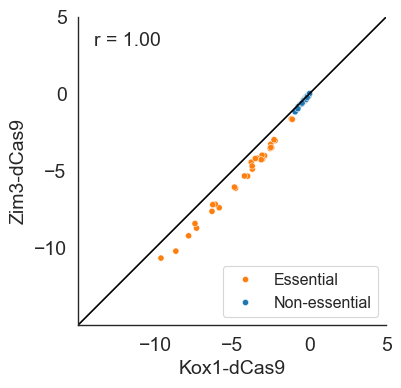

In [32]:
# Create a plot to test
sns.set_style("white")
sns.set_context("paper")
custom_palette = {'Non-essential': '#1f77b4','Essential': '#ff7f0e'}

# List of all columns to plot
columns = ['dCas9-Kox1 (Z-score)', 'dCas9-Kox1-MeCP2 (Z-score)','dCas9-Zim3 (Z-score)', 'Kox1-dCas9 (Z-score)', 'Zim3-dCas9 (Z-score)']

# Create scatter plots for each pair
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(4, 4))
        ax = sns.scatterplot(x=columns[i], y=columns[j], hue = 'Category', s=20,
                             data=selected_secondary_GeneAnnoZscore, palette=custom_palette, hue_order = {'Non-essential','Essential'})
        sns.despine()
        # Calculate the Pearson correlation
        corr = selected_secondary_GeneAnnoZscore[[columns[i], columns[j]]].corr(method = 'pearson').iloc[0, 1]
        
        # Plot title with correlation
        plt.text(0.05, 0.95, f'r = {corr:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

        x_label = columns[i].split(' ')[0]
        y_label = columns[j].split(' ')[0]
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)

       
        plt.legend(loc='lower right', fontsize='large')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        custom_ticks = [5, 0, -5, -10]
        ax.set_xticks(custom_ticks)
        ax.set_yticks(custom_ticks)
        ax.set_xlim(-15, 5)
        #ax.set_xlim(-110, 20)
        ax.set_ylim(-15, 5)
        #ax.set_ylim(-110, 20)
        ax.set_aspect('equal')
        ax.plot([0,1],[0,1], transform=ax.transAxes,color = 'black')

        figure_name = f'Gene_Scatter_{x_label}_vs_{y_label}.pdf'
        gpp.savefig(figure2_outpath + figure_name, format='pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)